In [127]:
import numpy as np, random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import os
import os.path as osp
import json
random.seed(33)


In [128]:
df_rd = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
cols = ["MedInc", "Latitude", "Longitude"]
df_3 = df_rd[cols]
df_3.to_csv("../data/df_3.csv", index=False)
df_3

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [129]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler()
mmx.fit(df_3)
df_3mmx = pd.DataFrame(mmx.transform(df_3), columns=df_3.columns)
df_3mmx.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,0.232464,0.328572,0.476125
std,0.131020,0.226988,0.199555
min,0.000000,0.000000,0.000000
25%,0.142308,0.147715,0.253984
50%,0.209301,0.182784,0.583665
75%,0.292641,0.549416,0.631474
max,1.000000,1.000000,1.000000


In [130]:
from sklearn.model_selection import train_test_split

X_tr, X_t = train_test_split(df_3mmx, test_size=0.2, random_state=33)
X_tr.head()

,MedInc,Latitude,Longitude
3578,0.166046,0.180659,0.579681
11132,0.255307,0.139214,0.639442
14862,0.146874,0.011690,0.723108
4929,0.080909,0.154091,0.608566
7805,0.219831,0.143464,0.623506


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=33)  
kmeans.fit(X_tr)
y_pred = kmeans.predict(X_t)
cluster_labels = pd.Series(np.concatenate([kmeans.labels_, y_pred]))
df_3mmx['cluster'] = cluster_labels.reset_index(drop=True)
kmeans.fit(df_3mmx)
df_3mmx['cluster'] = kmeans.labels_



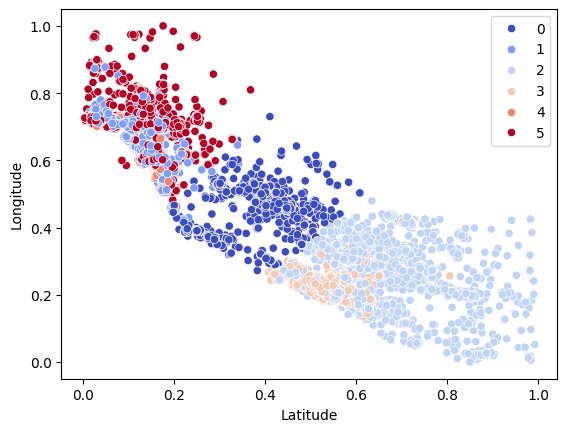

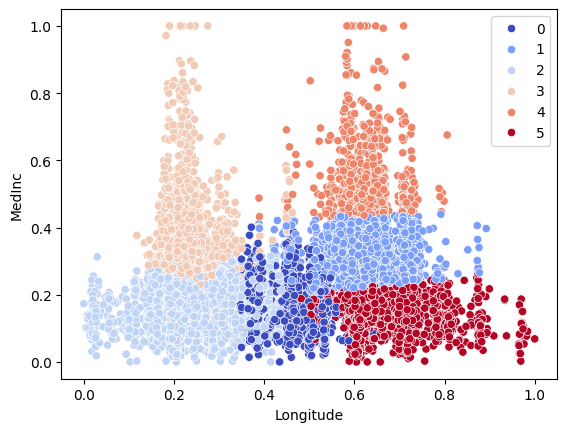

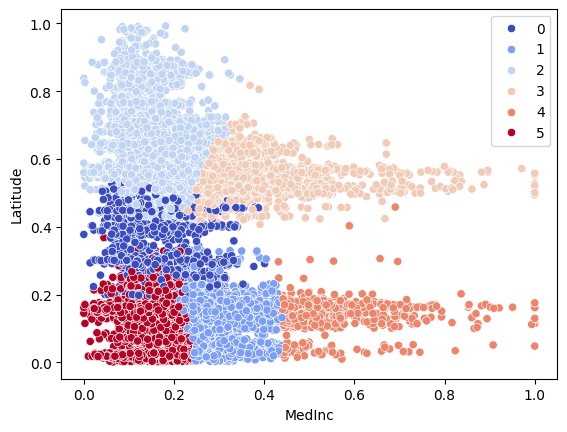

In [137]:
#Representamos el modelo Kmeans normalizado.
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data= X_tr.copy(), x = "Latitude", y = "Longitude", hue = y_tr, palette = "coolwarm")
plt.show()
sns.scatterplot(data= X_tr.copy(), x = "Longitude", y = "MedInc", hue = y_tr, palette = "coolwarm")
plt.show()
sns.scatterplot(data= X_tr.copy(), x = "MedInc", y = "Latitude", hue = y_tr, palette = "coolwarm")
plt.show()

In [138]:
'''#5.2) RANDOM FOREST, HIPEROPT OPTIMIZATION.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
space = {
    'n_estimators': hp.choice('n_estimators', list(np.random.randint(50, 500, 25))),  
    'max_depth': hp.choice('max_depth', np.random.randint(2, 101, 10)),
    'min_samples_split': hp.choice('min_samples_split', np.random.randint(2, 12, 10)),  
    'min_samples_leaf': hp.choice('min_samples_leaf', np.random.randint(2, 12, 10)),  
    'max_features': hp.choice('max_features', ['sqrt', 'log2', 1, None])
}
def objective(space):
    model = RandomForestClassifier(**space, random_state=42)
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_t)
    accuracy = accuracy_score(y_t, y_pred)
    global best_results
    best_results['params'] = space
    best_results['accuracy'] = accuracy
    return -accuracy  
best_results = {}
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100  
)
best_model = RandomForestClassifier(**best_results['params'], random_state=42)
best_model.fit(X_tr, y_tr)
with open('../models/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('../models/best_results.pkl', 'wb') as f:
    pickle.dump(best_results, f)
print("Best Hyperparameters:", best_results['params'])
print("Best Accuracy:", best_results['accuracy'])'''

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: Found input variables with inconsistent numbers of samples: [0, 4128]



  0%|          | 0/100 [00:01<?, ?trial/s, best loss=?]


ValueError: Found input variables with inconsistent numbers of samples: [0, 4128]

In [153]:
# Preprocess data (optional, but recommended for boosting algorithms)
# ... (e.g., scaling with MinMaxScaler)
from hyperopt import hp, fmin, tpe


# ... other imports and data preparation

# Define search space
space = {
    #'n_estimators': hp.quniform('n_estimators', 50, 1000, 1),
    #'max_depth': hp.quniform('max_depth', 2, 10, 1),
    #'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1)
}

# Define objective function
def objective(params):
    model = RandomForestClassifier(**params, random_state=33)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_t,y_pred)
    return -accuracy  # Minimize negative accuracy (maximize accuracy)

# Perform hyperparameter optimization
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100
)

# Train the best model
best_model = RandomForestClassifier(**best, random_state=42)
best_model.fit(X_train, y_train)

IndexError: list index out of range